## Statistical tests for stationarity

In [21]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
import pandas_datareader.data as web
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller

### Downloading the ETF data for the same underlying ( Nifty Bank ) to test for cointegration
https://www.nseindia.com/market-data/exchange-traded-funds-etf

In [22]:
df = pd.DataFrame()
tickers = ["SETFNIFBK.NS","KOTAKBKETF.NS","EBANK.NS"]
for ticker in tickers:
    df[ticker] = web.DataReader(ticker,"yahoo","2020-1-1","2020-6-30")["Adj Close"]
    
df.columns = tickers

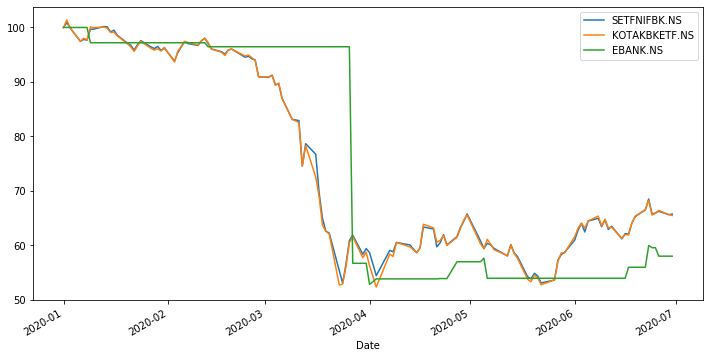

In [23]:
(df / df.iloc[0] * 100).plot(figsize=(12, 6))

### Testing if a price series is stationary using AD fuller test

In [24]:
adfuller(df[tickers[1]],maxlag=1)

(-1.320766228273058,
 0.6196190051795215,
 0,
 121,
 {'1%': -3.485585145896754,
  '5%': -2.885738566292665,
  '10%': -2.5796759080663887},
 818.4215359099943)

In [15]:
##ADF test statistic i -1.32, but the critical vaue at the 90% level is -2.57 so cant reject the null hypothesis that the price serie is not stationary

#### In the real life is difficult to find a series which is stationary. we can create a portfolio of individual price series so that the price series of this portfolio is stationary

Johansen test can be used to test multiple price series stationarity
It provides 2 statistics( trace statistics and eigen statistics) and the critical values for each of these statistics to test whether to reject the null hypothesis ( not cointegrating )

If all these hypothesis are rejected then clearly the price series are cointegrated

In [17]:
res = coint_johansen(df,0,1)

In [18]:
res.trace_stat_crit_vals #it gives the critical values with less that 90%, 95% and 99% values

array([[27.0669, 29.7961, 35.4628],
       [13.4294, 15.4943, 19.9349],
       [ 2.7055,  3.8415,  6.6349]])

In [19]:
res.trace_stat # trace statistics at r=0 and r=1 is rejected at 99% and r=2 is rejected at 90%

array([55.40249838, 25.63941538,  2.92676822])

As a byproduct, Eigen vectors can be used as hedge ratios for individual price series to form a stationary portfolio

In [20]:
res.evec# eigen vectors defines the shares of each etf
# Its arranged in the decreasing order of their half life

array([[ 7.43788313e-01, -2.41939748e-01,  4.65616966e-03],
       [-7.04408941e-01,  2.60072778e-01,  1.20282799e-02],
       [-1.91049140e-03, -1.85184156e-03,  7.13309520e-05]])

Reference : EP Chan: Winning Strategies and Their Rationale

Python for finance